## Airbnb Milan Data Cleaning & Visualization

### Dataset Overview:

This project analyzes Airbnb listings in the city of Milan, using data sourced from [Inside Airbnb](https://insideairbnb.com/get-the-data/), an independent and publicly available platform. The dataset was downloaded on **13 March 2025**, and reflects the status of listings and reviews up to that date.

It includes detailed information about each listing such as price, room type, availability, number of reviews, and neighborhood location. The goal of this analysis is to clean, explore, and visualize the dataset to uncover key insights about the short-term rental market in Milan. These insights can help understand market trends, identify pricing patterns, and explore geographical distribution across different neighborhoods.

## Project Objectives

- Clean and preprocess the Airbnb listings dataset for Milan.
- Explore key variables such as room type, price, availability, and location.
- Visualize data trends and distributions to gain insights.
- Identify patterns in pricing and review behavior.
- Present findings using clear, readable charts.



**Upload the Dataset and Set Up Environment**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Airbnb Milan listings.csv to Airbnb Milan listings.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Airbnb Milan listings.csv')
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,23986,""" Characteristic Milanese flat""",95941,Jeremy,NaN,NAVIGLI,45.448060,9.173730,Entire home/apt,180.0,31,26,2024-04-20,0.17,1,254,1,NaN
1,40470,Giacinto Cosy & clean flat near MM1,174203,Giacinto,NaN,VIALE MONZA,45.520230,9.227470,Entire home/apt,68.0,3,43,2024-08-17,0.25,2,319,1,IT015146C2YDCLSU8G
2,46536,Nico & Cinzia's Pink Suite!,138683,Nico&Cinzia,NaN,VIALE MONZA,45.522760,9.224780,Entire home/apt,86.0,3,37,2024-06-22,0.23,1,0,2,IT015209C2BBKGCMT7
3,84741,Nice room with private bathroom,443989,Francesca,NaN,PARCO FORLANINI - ORTICA,45.469994,9.244106,Private room,41.0,2,655,2025-02-27,3.89,3,43,73,"I applied for a CIN, but haven’t received it yet"
4,88130,Great comfortable & quite APT. x 4 people!,481475,Cinzia,NaN,VILLAPIZZONE,45.497640,9.145330,Entire home/apt,250.0,31,7,2022-10-01,0.04,1,363,0,NaN
5,101087,"Flat "" Chiesa Rossa2 in Milan",530151,Vincenzo,NaN,STADERA,45.430790,9.182340,Entire home/apt,76.0,31,9,2022-07-08,0.06,1,0,0,NaN
6,102817,Open Space Loft Navigli Area Milano,512747,Paolo Maurizio,NaN,S. CRISTOFORO,45.444650,9.150960,Entire home/apt,47.0,3,712,2025-02-26,4.39,2,51,29,IT015146C2A4KEPYF8
7,122514,Brand new apartment in Milan,613760,Marco,NaN,GIAMBELLINO,45.450320,9.152180,Entire home/apt,56.0,2,116,2025-01-02,0.70,2,69,21,IT015146C228VKSUZU
8,140874,Sleeping at the bottom of the Sea in Milan,685839,Serena,NaN,ISOLA,45.493800,9.185150,Private room,59.0,31,184,2025-02-21,1.11,1,168,29,NaN
9,153925,Stay in Style Solari,740161,Stefano Carmine,NaN,TORTONA,45.456480,9.157620,Entire home/apt,66.0,2,95,2025-03-11,0.58,1,60,29,IT015146C26SH22NUE


**Data Cleaning & Preprocessing**

In [7]:
df.info()

df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16114 entries, 0 to 16113
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16114 non-null  int64  
 1   name                            16114 non-null  object 
 2   host_id                         16114 non-null  int64  
 3   host_name                       16111 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   16114 non-null  object 
 6   latitude                        16114 non-null  float64
 7   longitude                       16114 non-null  float64
 8   room_type                       16114 non-null  object 
 9   price                           14626 non-null  float64
 10  minimum_nights                  16114 non-null  int64  
 11  number_of_reviews               16114 non-null  int64  
 12  last_review                     

,0
neighbourhood_group,16114
reviews_per_month,2641
last_review,2641
license,2580
price,1488
host_name,3
name,0
id,0
neighbourhood,0
host_id,0


In [9]:
df = df[['id', 'name', 'host_id', 'neighbourhood', 'latitude', 'longitude',
         'room_type', 'price', 'minimum_nights', 'number_of_reviews',
         'last_review', 'reviews_per_month', 'availability_365']]
df.head(10)

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,23986,""" Characteristic Milanese flat""",95941,NAVIGLI,45.448060,9.173730,Entire home/apt,180.0,31,26,2024-04-20,0.17,254
1,40470,Giacinto Cosy & clean flat near MM1,174203,VIALE MONZA,45.520230,9.227470,Entire home/apt,68.0,3,43,2024-08-17,0.25,319
2,46536,Nico & Cinzia's Pink Suite!,138683,VIALE MONZA,45.522760,9.224780,Entire home/apt,86.0,3,37,2024-06-22,0.23,0
3,84741,Nice room with private bathroom,443989,PARCO FORLANINI - ORTICA,45.469994,9.244106,Private room,41.0,2,655,2025-02-27,3.89,43
4,88130,Great comfortable & quite APT. x 4 people!,481475,VILLAPIZZONE,45.497640,9.145330,Entire home/apt,250.0,31,7,2022-10-01,0.04,363
5,101087,"Flat "" Chiesa Rossa2 in Milan",530151,STADERA,45.430790,9.182340,Entire home/apt,76.0,31,9,2022-07-08,0.06,0
6,102817,Open Space Loft Navigli Area Milano,512747,S. CRISTOFORO,45.444650,9.150960,Entire home/apt,47.0,3,712,2025-02-26,4.39,51
7,122514,Brand new apartment in Milan,613760,GIAMBELLINO,45.450320,9.152180,Entire home/apt,56.0,2,116,2025-01-02,0.70,69
8,140874,Sleeping at the bottom of the Sea in Milan,685839,ISOLA,45.493800,9.185150,Private room,59.0,31,184,2025-02-21,1.11,168
9,153925,Stay in Style Solari,740161,TORTONA,45.456480,9.157620,Entire home/apt,66.0,2,95,2025-03-11,0.58,60


In [10]:
df = df.dropna(subset=['latitude', 'longitude', 'price'])

df['price'] = df['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


In [13]:
df['price_category'] = pd.cut(df['price'], bins=[0, 50, 100, 200, 500, df['price'].max()], labels=['Budget', 'Low-Mid', 'Mid', 'High', 'Luxury'])

df['price_category'].value_counts()


,count
price_category,
Low-Mid,7430
Mid,4513
High,1180
Budget,1061
Luxury,442


**Data Visualization**
---
**Room type distribution**


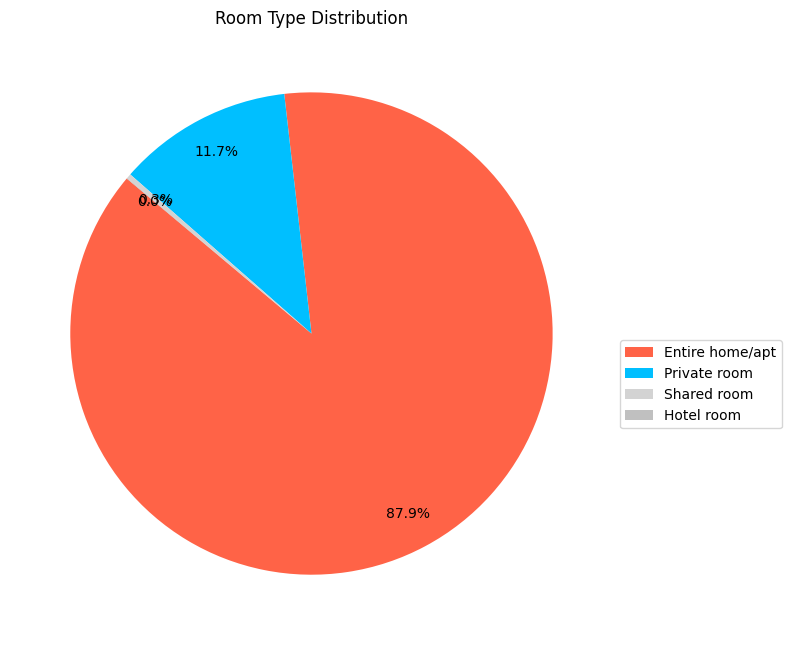

In [14]:
room_counts = df['room_type'].value_counts()
labels = room_counts.index
sizes = room_counts.values
colors = ['tomato', 'deepskyblue', 'lightgrey', 'silver']

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=None, autopct='%1.1f%%', colors=colors, startangle=140, pctdistance=0.85)

plt.legend(labels, loc='best', bbox_to_anchor=(1, 0.5))

plt.title('Room Type Distribution')
plt.tight_layout()
plt.show()


Comment:

The vast majority of Airbnb listings in Milan are for *Entire home/apartment* (87.9%), indicating that hosts mainly offer full properties rather than shared spaces. *Private rooms* make up around 11.7%, while *Shared rooms* and *Hotel rooms* are very rare, together accounting for less than 1% of listings.


**Price distribution**

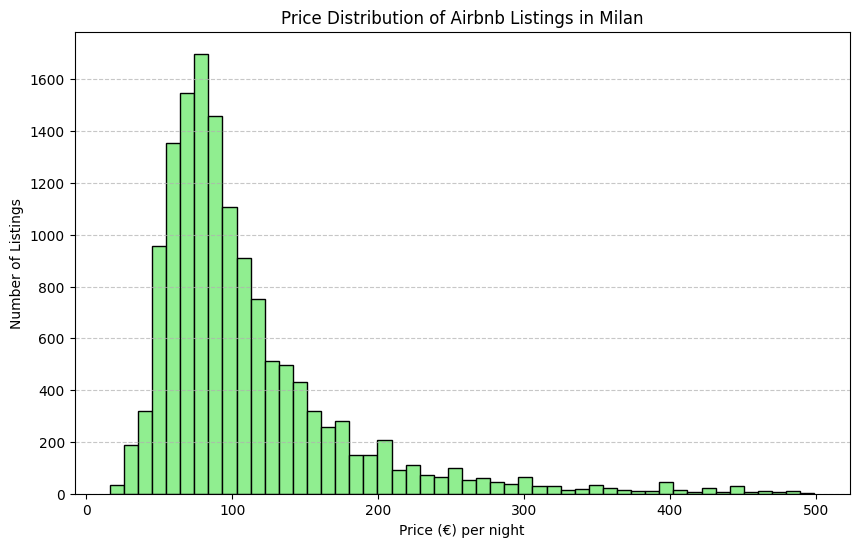

In [23]:
filtered_prices = df[df['price'] < 500]['price']

plt.figure(figsize=(10, 6))
plt.hist(filtered_prices, bins=50, color='lightgreen', edgecolor='black')

plt.title('Price Distribution of Airbnb Listings in Milan')
plt.xlabel('Price (€) per night')
plt.ylabel('Number of Listings')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Comment:

Most Airbnb listings in Milan have nightly prices below €150, with a sharp drop-off beyond that range. A few listings are priced much higher, but they are relatively rare and were excluded (above €500) to improve visibility of the overall distribution.


**Average Price by Room Type**

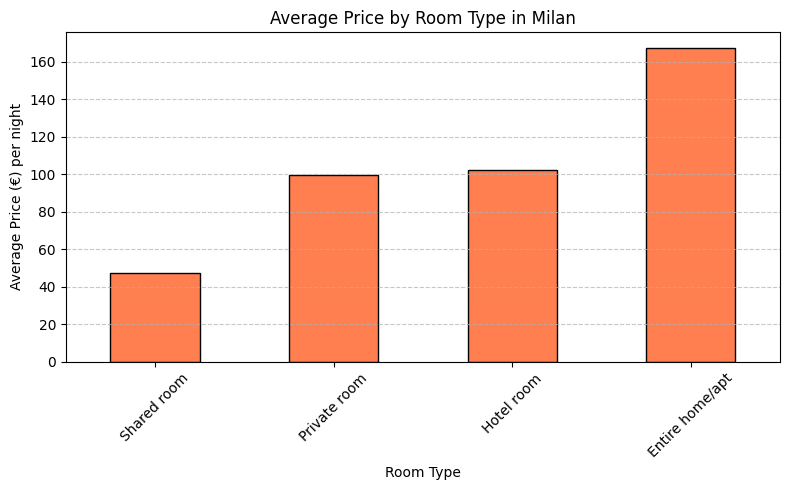

In [26]:
avg_price_room = df.groupby('room_type')['price'].mean().sort_values()

plt.figure(figsize=(8,5))
avg_price_room.plot(kind='bar', color='coral', edgecolor='black')

plt.title('Average Price by Room Type in Milan')
plt.xlabel('Room Type')
plt.ylabel('Average Price (€) per night')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Comment:

Entire homes/apartments have the highest average nightly rate, significantly above private and shared rooms. This reflects the greater space, privacy, and amenities typically offered by full-property rentals. Shared and hotel rooms are priced considerably lower on average.


**Reviews vs Price**

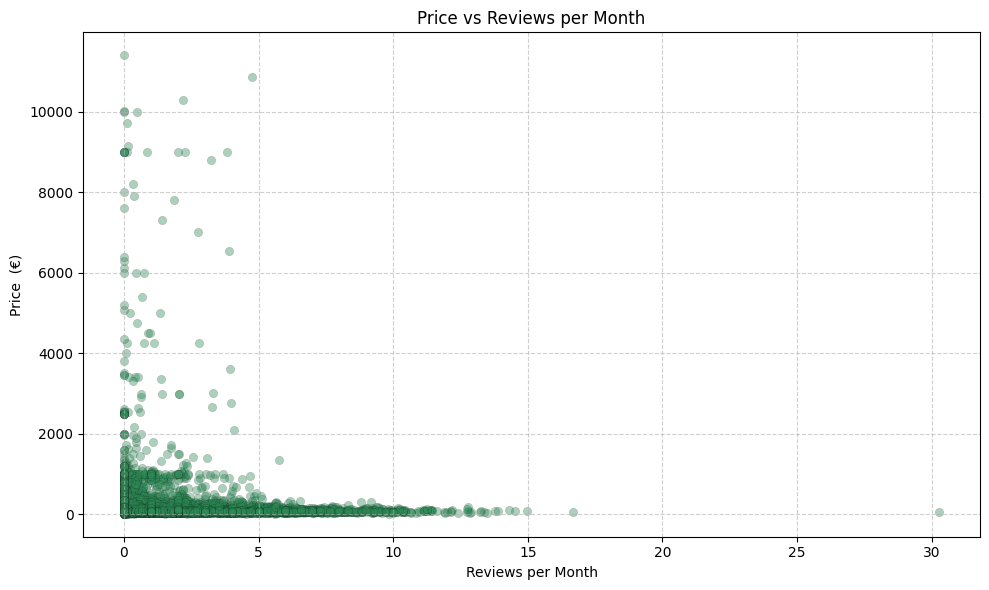

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(df['reviews_per_month'], df['price'], alpha=0.4, color='seagreen', edgecolor='black', linewidth=0.2)
plt.title('Price vs Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Price  (€)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Comment:

The scatter plot shows that lower-priced listings generally receive more reviews per month, suggesting higher booking frequency. In contrast, higher-priced listings tend to have fewer reviews, indicating less frequent stays or niche demand. Overall, this suggests that affordability is a strong driver of booking volume in the Milan market.

 **Availability vs Reviews**



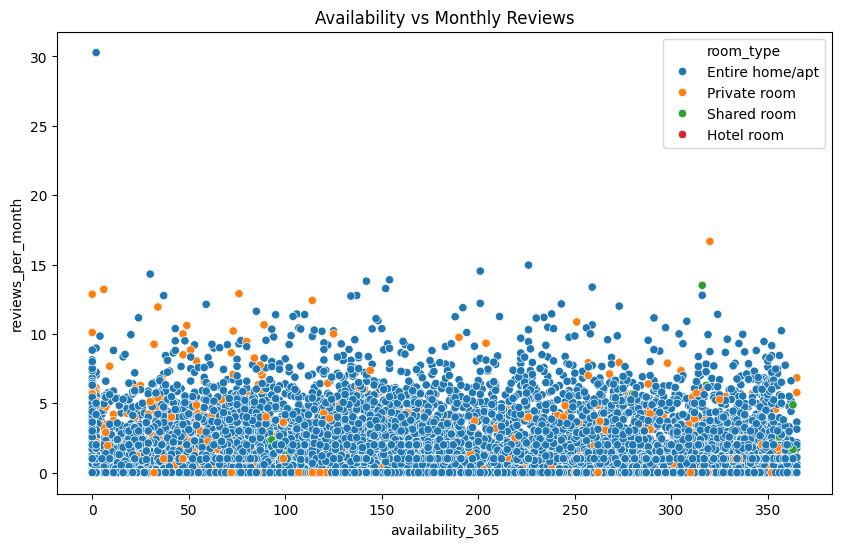

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='availability_365', y='reviews_per_month', hue='room_type')
plt.title('Availability vs Monthly Reviews')
plt.show()


Comment:

This scatter plot shows that listings with higher availability generally receive more monthly reviews, especially entire homes and private rooms. It suggests that consistent availability increases booking frequency and guest engagement.

Listings with low reviews but high availability might be inactive or new.

**Top neighbourhoods by number of listings**

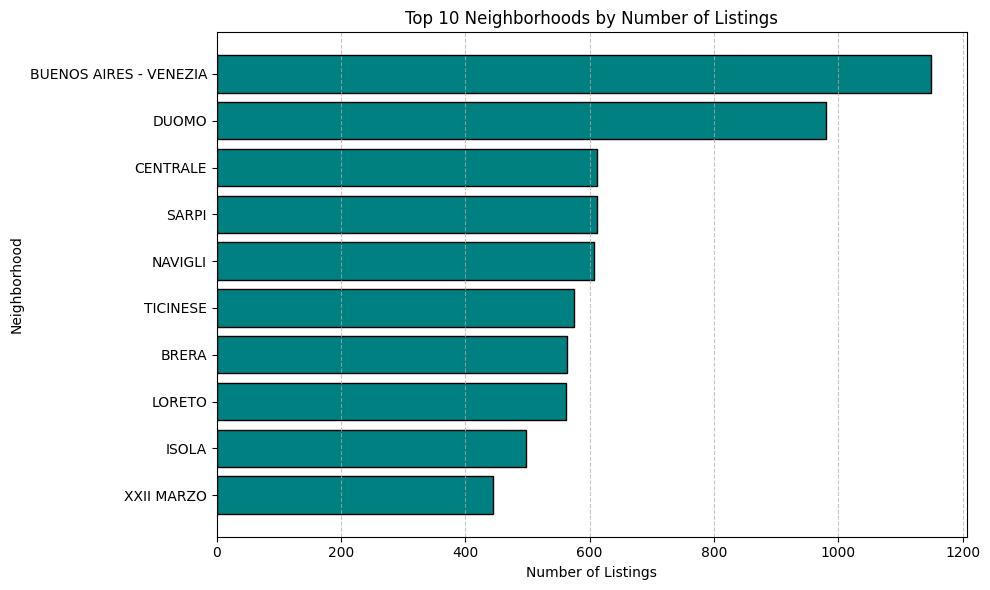

In [ ]:
top_neigh = df['neighbourhood'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_neigh.index[::-1], top_neigh.values[::-1], color='teal', edgecolor='black')
plt.title('Top 10 Neighborhoods by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Comment:

Popular areas for Airbnb listings in Milan include Corso Buenos Aires–Porta Venezia - one of the city’s main shopping districts, Duomo in the historical center, Centrale near the main train station, Sarpi (Chinatown), and the vibrant Navigli district, known for its nightlife and canals. These neighborhoods likely attract high demand due to their central locations, accessibility, and cultural or commercial appeal.

**Availability Distribution**

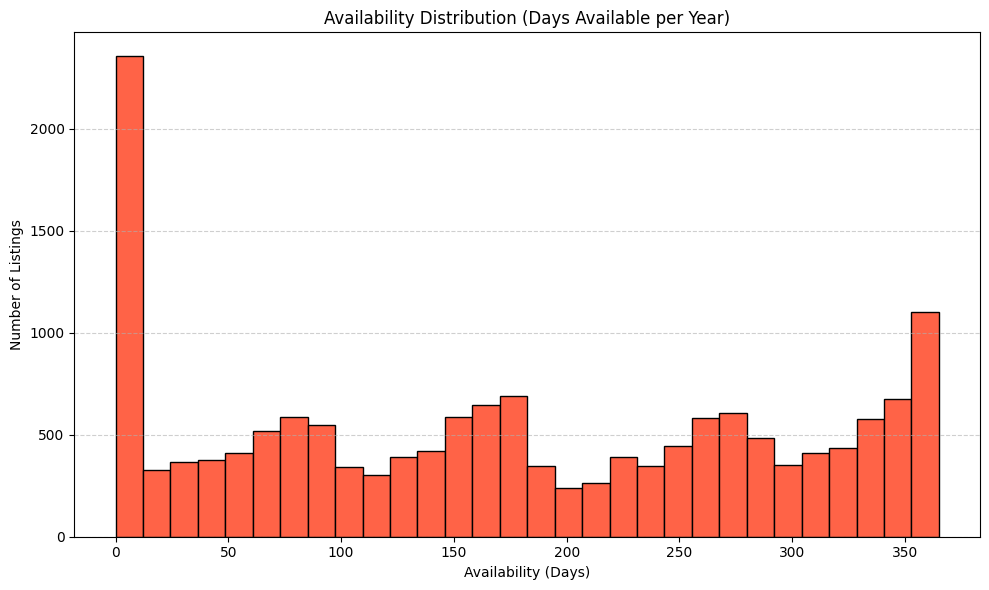

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['availability_365'], bins=30, color='tomato', edgecolor='black')
plt.title('Availability Distribution (Days Available per Year)')
plt.xlabel('Availability (Days)')
plt.ylabel('Number of Listings')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Comment:

The histogram shows a dual-peak pattern in Milan’s Airbnb market: a spike at 0 days suggests many inactive or seasonal listings, while the peak at 365 days indicates numerous year-round, likely professional hosts. The spread in between reflects part-time activity, highlighting the mix of casual and commercial hosting in the city.

This dual-peak pattern highlights the coexistence of casual and commercial hosting in Milan’s Airbnb market, and it may inform strategies around regulation, competition, or service targeting.

## Key Insights

- Most listings in Milan are "Entire home/apt", suggesting strong demand for full units.
- Most listings are under €150, making them accessible to a wide range of tourists, but some exceeding €500.
- Central neighborhoods dominate listing volume, especially near tourist zones.
- Listings with higher availability tend to have more reviews, indicating frequent bookings.
